In [19]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

print(total_train, total_val, total_test)

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

2001 1001 51


In [21]:
train_image_generator = ImageDataGenerator(
    rescale=(1/255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_image_generator = ImageDataGenerator(rescale=(1/255))

validation_image_generator = ImageDataGenerator(rescale=(1/255))

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    classes=['test'],
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


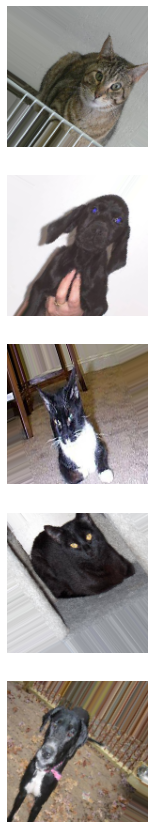

In [22]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [23]:
model = Sequential()
model.add(Conv2D(150, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((8, 8)))
model.add(Conv2D(300, (3, 3), activation='relu'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(300, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 150)     4200      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 150)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 300)       405300    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 300)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 300)         810300    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)              

In [24]:
history = model.fit_generator(train_data_gen, epochs=epochs, validation_data=val_data_gen)

Epoch 1/15
16/16 [==============================] - 107s 7s/step - loss: 0.7063 - accuracy: 0.5015 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 104s 6s/step - loss: 0.6930 - accuracy: 0.5020 - val_loss: 0.6904 - val_accuracy: 0.5710
Epoch 3/15
16/16 [==============================] - 103s 6s/step - loss: 0.6908 - accuracy: 0.5185 - val_loss: 0.6827 - val_accuracy: 0.5070
Epoch 4/15
16/16 [==============================] - 103s 6s/step - loss: 0.6843 - accuracy: 0.5495 - val_loss: 0.6650 - val_accuracy: 0.6220
Epoch 5/15
16/16 [==============================] - 104s 7s/step - loss: 0.6666 - accuracy: 0.5915 - val_loss: 0.7160 - val_accuracy: 0.5470
Epoch 6/15
16/16 [==============================] - 105s 7s/step - loss: 0.6511 - accuracy: 0.6190 - val_loss: 0.6098 - val_accuracy: 0.6460
Epoch 7/15
16/16 [==============================] - 104s 6s/step - loss: 0.6282 - accuracy: 0.6385 - val_loss: 0.5842 - val_accuracy: 0.6820
Epoch 8/15
16

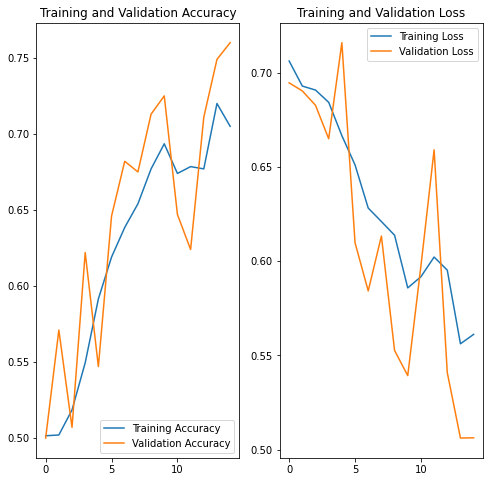

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
predictions = model.predict(test_data_gen)

probabilities = [np.argmax(i) for i in predictions]

In [27]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))*100

print(f"Model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")


Model correctly identified 74.0% of the images of cats and dogs.


In [ ]:
probs = [max(i) for i in predictions]
sample_testing_images, _ = next(test_data_gen)
plotImages(sample_testing_images, probs)